In [321]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

___

<H1>K-Nearest Neighbors</H1>


K-Nearest Neighbors is classification algorithm that can be used for both classification and regression task. It takes two features and determines the likelihood that a data point belongs to another specific data subgroup based on what group the data point is nearest to. Since it is a supervised algorithm, we can expect for the data points to be labeled. 

If we are working a regression problem, this could be as simple as getting the mean of the 10 outputs. For a classification problem, this might be solved using majority voting and taking the average of the inputs which could include weighting the distance from p so closer points can contribute in the final value.

<H2>How does it work?</H2>

Four of the most common ways KNN calculates the distance between the data points is through is Euclidean distance, Manhattan distance, Hamming distance, and Minkowski distance with Euclidean being the simplest. This method calculates the distance by taking the square root of the difference of two given points.


One of the most popular forms of Euclidean distance is the Root Mean Squared Error (RMSE). This takes the square root of the average squared distance between the actual score and the predicted score. 



While KNN is fast and requires no explicit training it is memory intensive and predictions can take along time. There are better algorthims than brute force.

___

In [335]:
wine_data = load_wine()

We now want to test out how well our KNN algorithm will predict a value in our data.

In [336]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [337]:
X=wine_data.data
y=wine_data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

<h2>Scaling</h2>

Before we begin working with our data, I'll scale the model to remove any outliers that could possible exisit</p>
the data.

In [338]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<h2>K-Value</h2>

I want to test how important it is to choose the right k-value. Remember, choosing the right value is called parameter tunning and its imperative for better results. will In the first part we will choose an arbritrary number.

In [339]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [340]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [341]:
y_pred =  classifier.predict(X_test)
y_pred 

array([1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [342]:
y_test

array([1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [343]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.027777777777777776
0.9543147208121827


# Evaluation

We look at our MSE and R2 values. We want our MSE to be as low as possible and our R2 to be as high as possible. In this case, with a k-value of 11, we get an MSE of .02 and a R2_score of .95. Not bad! Lets look at how it compares to the data.

/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


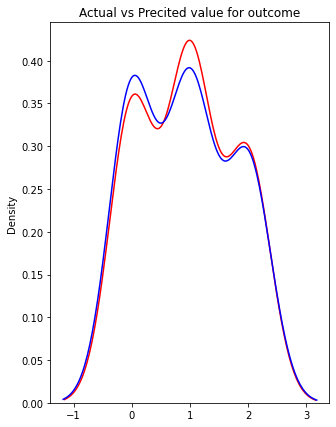

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

From the looks of it, there is still room for improvement. Lets see if we can do better.

# Choosing the right k-value

We saw from our first test run that choosing an arbitrary value produced an ok prediction. In this next run, we will test a range of values and see which one produces the lowest error.

In [345]:
#Choosing our k-Value
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred)) 

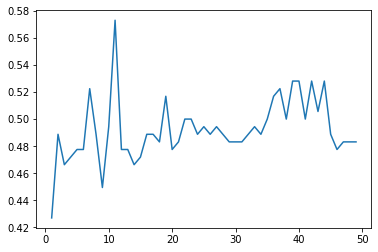

In [346]:
import matplotlib.pyplot as plt
plt.plot(range(1,50),error)

From the looks of it, it could possibly be a 7 or 8, so we will use a 7 as our k-value. To be sure we could also use this formula to determine the k-value.

$$k = sqrt(total number of data points)$$

In [347]:
import math
math.sqrt(len(y_test))

6.0

Since it can't be a even number, we can either select a 5 or a 7. In this case, I'll choose a 7.

In [348]:
classifier = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')

In [349]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [350]:
y_pred =  classifier.predict(X_test)
y_pred 

array([1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [351]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.0
1.0


# Evaluation

Our SME produced a value of 0.0 while our R2 produced a value of 1. It was 100% accurate! 

/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


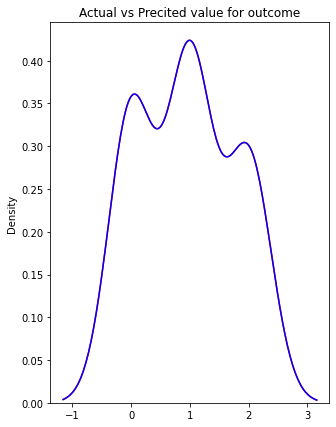

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

As we can see, the predictions where on par with the values.